In [3]:
'''一个例子，现分别有 A、B 两个容器，在容器 A 里分别有 7 个红球和 3 个白球，
在容器 B 里有 1 个红球和 9 个白球，现已知从这两个容器里任意抽出了一个球，且是红球，
问这个红球是来自容器 A 的概率是多少?'''

# 取一个球这个球是红球
#P(B) = 8/20

#P(A) = 1/2

# A容器中选中红球的概率
#P(B|A) = 7/10

#P(A|B) = P(A)*P(B|A)/P(B)

'一个例子，现分别有 A、B 两个容器，在容器 A 里分别有 7 个红球和 3 个白球，\n在容器 B 里有 1 个红球和 9 个白球，现已知从这两个容器里任意抽出了一个球，且是红球，\n问这个红球是来自容器 A 的概率是多少?'

In [5]:
1/2*7/10*20/8 = 7/8

0.875

In [6]:
'''例如：一座别墅在过去的 20 年里一共发生过 2 次被盗，别墅的主人有一条狗，
狗平均每周晚上叫 3 次，在盗贼入侵时狗叫的概率被估计为 0.9，问题是：在狗叫的时候发生入侵的概率是多少？'''


# 贝叶斯公式
# 被盗定义成事件B
# P(B) = 2/(20*365)

# 狗叫事件A
# P(A) = 3/7

# 盗贼入侵时狗叫的概率0.9
# P(A|B) = 0.9

# 在狗叫的时候发生入侵的概率是多少？
# P(B|A) = P(B)*P(A|B)/P(A)

# 计算所得概率是0.00058
2/(20*365)*0.9*7/3

0.0005753424657534246

In [7]:
# 独立性假设，假设属性之间没有关系
from sklearn.naive_bayes import GaussianNB

## 二、3种贝叶斯模型


高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据

In [31]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris['data']
y = iris['target']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 <BarContainer object of 20 artists>)

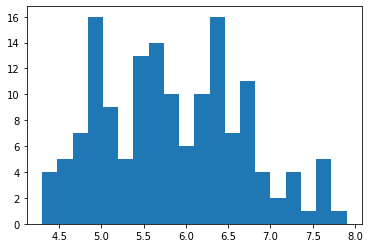

In [34]:
# 數據類似正态分布
plt.hist(X[:,0],bins=20)

(array([ 4., 33., 11.,  2.,  0.,  0.,  1.,  2.,  3.,  5., 12., 14., 12.,
        17.,  6., 12.,  7.,  4.,  2.,  3.]),
 array([1.   , 1.295, 1.59 , 1.885, 2.18 , 2.475, 2.77 , 3.065, 3.36 ,
        3.655, 3.95 , 4.245, 4.54 , 4.835, 5.13 , 5.425, 5.72 , 6.015,
        6.31 , 6.605, 6.9  ]),
 <BarContainer object of 20 artists>)

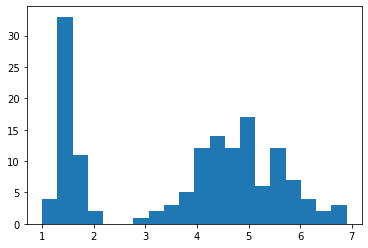

In [35]:
plt.hist(X[:,2],bins=20)

(array([34.,  7.,  7.,  1.,  1.,  0.,  0.,  7.,  3.,  5., 21., 12.,  4.,
         2., 12., 11.,  6.,  3.,  8.,  6.]),
 array([0.1 , 0.22, 0.34, 0.46, 0.58, 0.7 , 0.82, 0.94, 1.06, 1.18, 1.3 ,
        1.42, 1.54, 1.66, 1.78, 1.9 , 2.02, 2.14, 2.26, 2.38, 2.5 ]),
 <BarContainer object of 20 artists>)

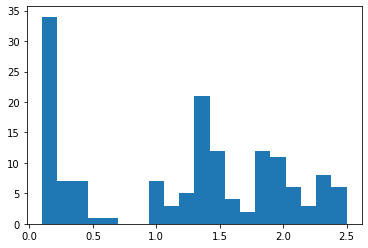

In [36]:
plt.hist(X[:,-1],bins=20)

### 1、高斯分布朴素贝叶斯

高斯分布就是正态分布

【用途】用于一般分类问题

使用自带的鸢尾花数据

In [37]:
# 数据分布满足高斯分布正太分布，GaussianNB，效果很好
# BernoulliNB 二分布，硬币，正面反面，概率差不多
# MultinomialNB 投掷筛子，多分布，6个面概率差不多
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [38]:
gNB = GaussianNB()

gNB.fit(X_train,y_train)

gNB.score(X_test,y_test)

0.9333333333333333

### 2、多项式分布朴素贝叶斯

多项式分布：

![12.jpg](attachment:12.jpg)

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

#### 例：延续上面，使用鸢尾花数据

In [39]:
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

mNB.score(X_test,y_test)

0.7666666666666667

### 3、伯努利分布朴素贝叶斯

伯努利分布：

![11.png](attachment:11.png)

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

In [40]:
bNB = BernoulliNB()

bNB.fit(X_train,y_train)

bNB.score(X_test,y_test)

0.13333333333333333

## 三、文本分类实战
对短信进行二分类，数据为SMSSpamCollection


文本必須先進行預處理

NLP nature language process: 自然語言處理 -->需要將文本類型合理的數據轉化成數字化，計算機才能計算



使用map可以對簡單的單詞使用

但是複雜的沒辦法


簡單的可以使用貝葉斯

複雜的建議使用神經網路的RNN


重點:

   合理處理語言--> 一詞 兩詞 或是三詞加和都不一樣
   合理數量化

In [41]:
import pandas as pd

In [42]:
data = pd.read_csv('./data/SMSSpamCollection',sep = '\t',header=None,names=['target','message'])
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
X = data['message']
y = data['target']

In [44]:
X.unique().size

5169

 sklearn NLP處理 https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction



In [45]:
# 统计词频包
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer()

In [47]:
X_cv = cv.fit_transform(X)
X_cv

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [48]:
# 詞語對應的數字
cv.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [49]:
print(X_cv)

  (0, 3571)	1
  (0, 8084)	1
  (0, 4374)	1
  (0, 5958)	1
  (0, 2338)	1
  (0, 1316)	1
  (0, 5571)	1
  (0, 4114)	1
  (0, 1767)	1
  (0, 3655)	1
  (0, 8548)	1
  (0, 4501)	1
  (0, 1765)	1
  (0, 2061)	1
  (0, 7694)	1
  (0, 3615)	1
  (0, 1082)	1
  (0, 8324)	1
  (1, 5538)	1
  (1, 4537)	1
  (1, 4342)	1
  (1, 8450)	1
  (1, 5567)	1
  (2, 4114)	1
  (2, 3373)	1
  :	:
  (5570, 4245)	1
  (5570, 8371)	1
  (5570, 1097)	1
  (5570, 4642)	1
  (5570, 7089)	1
  (5570, 3323)	1
  (5570, 7674)	1
  (5570, 1451)	1
  (5570, 5367)	1
  (5570, 2606)	1
  (5570, 8120)	1
  (5570, 1794)	1
  (5570, 7099)	1
  (5570, 2905)	1
  (5570, 3489)	1
  (5570, 1802)	1
  (5570, 3709)	1
  (5570, 4188)	1
  (5570, 914)	1
  (5570, 1561)	1
  (5571, 7806)	1
  (5571, 5276)	1
  (5571, 4253)	2
  (5571, 7938)	1
  (5571, 6548)	1


In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size =0.2 )

In [57]:
%%time
# 高斯分布不能接受稀鬆矩陣、她只能接受叢密矩陣
#gNB = GaussianNB()
#gNB.fit(X_train,y_train)


gNB = GaussianNB()
gNB.fit(X_train.toarray(),y_train)
gNB.score(X_test.toarray(),y_test)

Wall time: 787 ms


0.9139013452914798

In [58]:
%%time
# 多项式分布
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.9811659192825112
Wall time: 11 ms


In [59]:
%%time
# 柏努力 
bNB = BernoulliNB()

bNB.fit(X_train,y_train)

bNB.score(X_test,y_test)

Wall time: 10.9 ms


0.9730941704035875

In [54]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

In [55]:
#KNN
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9067264573991032

In [56]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9748878923766816

In [60]:
#使用stop_words來刪除多餘字

cv = CountVectorizer(stop_words='english')

X_cv2 = cv.fit_transform(X)
X_cv2

<5572x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 43578 stored elements in Compressed Sparse Row format>

In [63]:
%%time

X_train,X_test,y_train,y_test = train_test_split(X_cv2,y,test_size = 0.2)

# 多项式分布
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.97847533632287
Wall time: 28.9 ms


导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
# Equivalent to CountVectorizer followed by TfidfTransformer.
# term frequency 词频，idf inverse documents frequency
# 相当于对词频，加了权重
# 的，了，你，我，他分类，作用不大，因为所有文章，都出现很多
# 作为分类的词，特点：一类文章中，出现次数很多，其他文章中出现很少
# tf-idf (term frequency-inverse document frequency) 是一種用於信息檢索與數據挖掘的常用加權技術

tf_idf = TfidfVectorizer()

X3 = tf_idf.fit_transform(X)
X3

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [68]:
%%time

X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size = 0.2)

# 多项式分布
mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.9524663677130045
Wall time: 24.9 ms


In [69]:
from sklearn.feature_extraction.text import HashingVectorizer

In [70]:
hv = HashingVectorizer()

X4 = hv.fit_transform(X)

X4

<5572x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [72]:
import numpy as np
print(np.abs(X4))

  (0, 217534)	0.23570226039551587
  (0, 298067)	0.23570226039551587
  (0, 304864)	0.23570226039551587
  (0, 307669)	0.23570226039551587
  (0, 346524)	0.23570226039551587
  (0, 396254)	0.23570226039551587
  (0, 481047)	0.23570226039551587
  (0, 528700)	0.23570226039551587
  (0, 604544)	0.23570226039551587
  (0, 630479)	0.23570226039551587
  (0, 639749)	0.23570226039551587
  (0, 653949)	0.23570226039551587
  (0, 707424)	0.23570226039551587
  (0, 787517)	0.23570226039551587
  (0, 809054)	0.23570226039551587
  (0, 828689)	0.23570226039551587
  (0, 859130)	0.23570226039551587
  (0, 992018)	0.23570226039551587
  (1, 284109)	0.4472135954999579
  (1, 338849)	0.4472135954999579
  (1, 374789)	0.4472135954999579
  (1, 536132)	0.4472135954999579
  (1, 913144)	0.4472135954999579
  (2, 32615)	0.1643989873053573
  (2, 34389)	0.1643989873053573
  :	:
  (5570, 174974)	0.20412414523193154
  (5570, 180525)	0.20412414523193154
  (5570, 189643)	0.20412414523193154
  (5570, 221403)	0.20412414523193154
  (55

In [73]:
X_train,X_test,y_train,y_test = train_test_split(np.abs(X4),y,test_size = 0.2)

mNB = MultinomialNB()

mNB.fit(X_train,y_train)

print(mNB.score(X_test,y_test))

0.8834080717488789


In [74]:
#哈希直準確率不高  以單詞為單位 準確率高一些

In [75]:
tf_idf.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]